In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import functions as fn
from numpy import nan

In [21]:
data = pd.read_csv('CleanDataEncoded.csv').drop('Unnamed: 0', axis=1)
print data.shape
data.head()

(35143, 15)


,State,Area,Year,UnemploymentRate,Change,Region,LHS,HS,SC,BD,Pop_Est,MedianIncome,RegionCode,StateCode,AreaCode
0,AL,Alabama,2007,4.0,NaN,South,NaN,NaN,NaN,NaN,NaN,42212.0,2,1,9
1,AL,Alabama,2008,5.7,1.7,South,NaN,NaN,NaN,NaN,NaN,44476.0,2,1,9
2,AL,Alabama,2009,11.0,5.3,South,NaN,NaN,NaN,NaN,NaN,39980.0,2,1,9
3,AL,Alabama,2010,10.5,-0.5,South,NaN,NaN,NaN,NaN,NaN,40933.0,2,1,9
4,AL,Alabama,2011,9.6,-0.9,South,NaN,NaN,NaN,NaN,4798649.0,42590.0,2,1,9


In [22]:
# Create a list with the education date by area. This is to fill in null values
means_LHS = dict(data.groupby('Area').LHS.mean())
means_HS = dict(data.groupby('Area').HS.mean())
means_SC = dict(data.groupby('Area').SC.mean())
means_BD = dict(data.groupby('Area').BD.mean())

In [23]:
# Fill in nulls for LHS
lhs = []

k=0
for i in data.index:
    area = data.Area[i]
    if not pd.isnull(data.LHS[i]):
        lhs.append(data.LHS[i])
    elif pd.isnull(data.LHS[i]) and data.Area[i]==area:
        lhs.append(means_LHS[area])
    elif data.Area[i]!=area:
        k+=1

data.LHS = lhs

In [24]:
# Fill in nulls for HS
hs = []

k=0
for i in data.index:
    area = data.Area[i]
    if not pd.isnull(data.HS[i]):
        hs.append(data.HS[i])
    elif pd.isnull(data.HS[i]) and data.Area[i]==area:
        hs.append(means_HS[area])
    elif data.Area[i]!=area:
        k+=1

data.HS = hs

In [25]:
# Fill in nulls for SC
sc = []

k=0
for i in data.index:
    area = data.Area[i]
    if not pd.isnull(data.SC[i]):
        sc.append(data.SC[i])
    elif pd.isnull(data.SC[i]) and data.Area[i]==area:
        sc.append(means_SC[area])
    elif data.Area[i]!=area:
        k+=1

data.SC = sc

In [26]:
# Fill in nulls for BD
bd = []

k=0
for i in data.index:
    area = data.Area[i]
    if not pd.isnull(data.BD[i]):
        bd.append(data.BD[i])
    elif pd.isnull(data.BD[i]) and data.Area[i]==area:
        bd.append(means_BD[area])
    elif data.Area[i]!=area:
        k+=1

data.BD = bd

In [27]:
data.Change = data.Change.fillna(0)
data.head()

,State,Area,Year,UnemploymentRate,Change,Region,LHS,HS,SC,BD,Pop_Est,MedianIncome,RegionCode,StateCode,AreaCode
0,AL,Alabama,2007,4.0,0.0,South,15.2,31.0,29.8,24.0,NaN,42212.0,2,1,9
1,AL,Alabama,2008,5.7,1.7,South,15.2,31.0,29.8,24.0,NaN,44476.0,2,1,9
2,AL,Alabama,2009,11.0,5.3,South,15.2,31.0,29.8,24.0,NaN,39980.0,2,1,9
3,AL,Alabama,2010,10.5,-0.5,South,15.2,31.0,29.8,24.0,NaN,40933.0,2,1,9
4,AL,Alabama,2011,9.6,-0.9,South,15.2,31.0,29.8,24.0,4798649.0,42590.0,2,1,9


In [28]:
# fill in null values in MedianIncome column (for areas) with the value for that state
years = []
income = []

for i in data.index:
    if not pd.isnull(data.MedianIncome[i]):
        state = data.State[i]
        income.append(data.MedianIncome[i])
        
    elif pd.isnull(data.MedianIncome[i]) and data.State[i]==state:
        income.append(income[i-11]) 
    
    
income = pd.Series(income)
data.MedianIncome = income
data.head()

,State,Area,Year,UnemploymentRate,Change,Region,LHS,HS,SC,BD,Pop_Est,MedianIncome,RegionCode,StateCode,AreaCode
0,AL,Alabama,2007,4.0,0.0,South,15.2,31.0,29.8,24.0,NaN,42212.0,2,1,9
1,AL,Alabama,2008,5.7,1.7,South,15.2,31.0,29.8,24.0,NaN,44476.0,2,1,9
2,AL,Alabama,2009,11.0,5.3,South,15.2,31.0,29.8,24.0,NaN,39980.0,2,1,9
3,AL,Alabama,2010,10.5,-0.5,South,15.2,31.0,29.8,24.0,NaN,40933.0,2,1,9
4,AL,Alabama,2011,9.6,-0.9,South,15.2,31.0,29.8,24.0,4798649.0,42590.0,2,1,9


In [29]:
# Fill in null values for Population estimate
# Create a list with the values from the Pop_Est column, filling in zeros for null values
pop_est = []

for value in data.Pop_Est:
    if pd.isnull(value):
        pop_est.append(0)
    elif not pd.isnull(value):
        pop_est.append(value)
        
for i in range(0,len(pop_est)):
    if pop_est[i]==0:
        i+=1
    elif pop_est!=0 and pop_est[i-1]==0 and i<len(pop_est)-1:
        rate=(pop_est[i+1] - pop_est[i])/pop_est[i]
        pop_est[i-1] = pop_est[i] - rate*pop_est[i]
        pop_est[i-2] = pop_est[i-1] - rate*pop_est[i-1]
        pop_est[i-3] = pop_est[i-2] - rate*pop_est[i-2]
        pop_est[i-4] = pop_est[i-3] - rate*pop_est[i-3]
 
pop_est = pd.Series(pop_est)
data2= data.copy()
data2.Pop_Est = pop_est.astype(int)
        
# data2.head(10)
z = data[data.Pop_Est==0]
print len(z)

0


In [44]:
data2.to_csv('FinalData.csv')

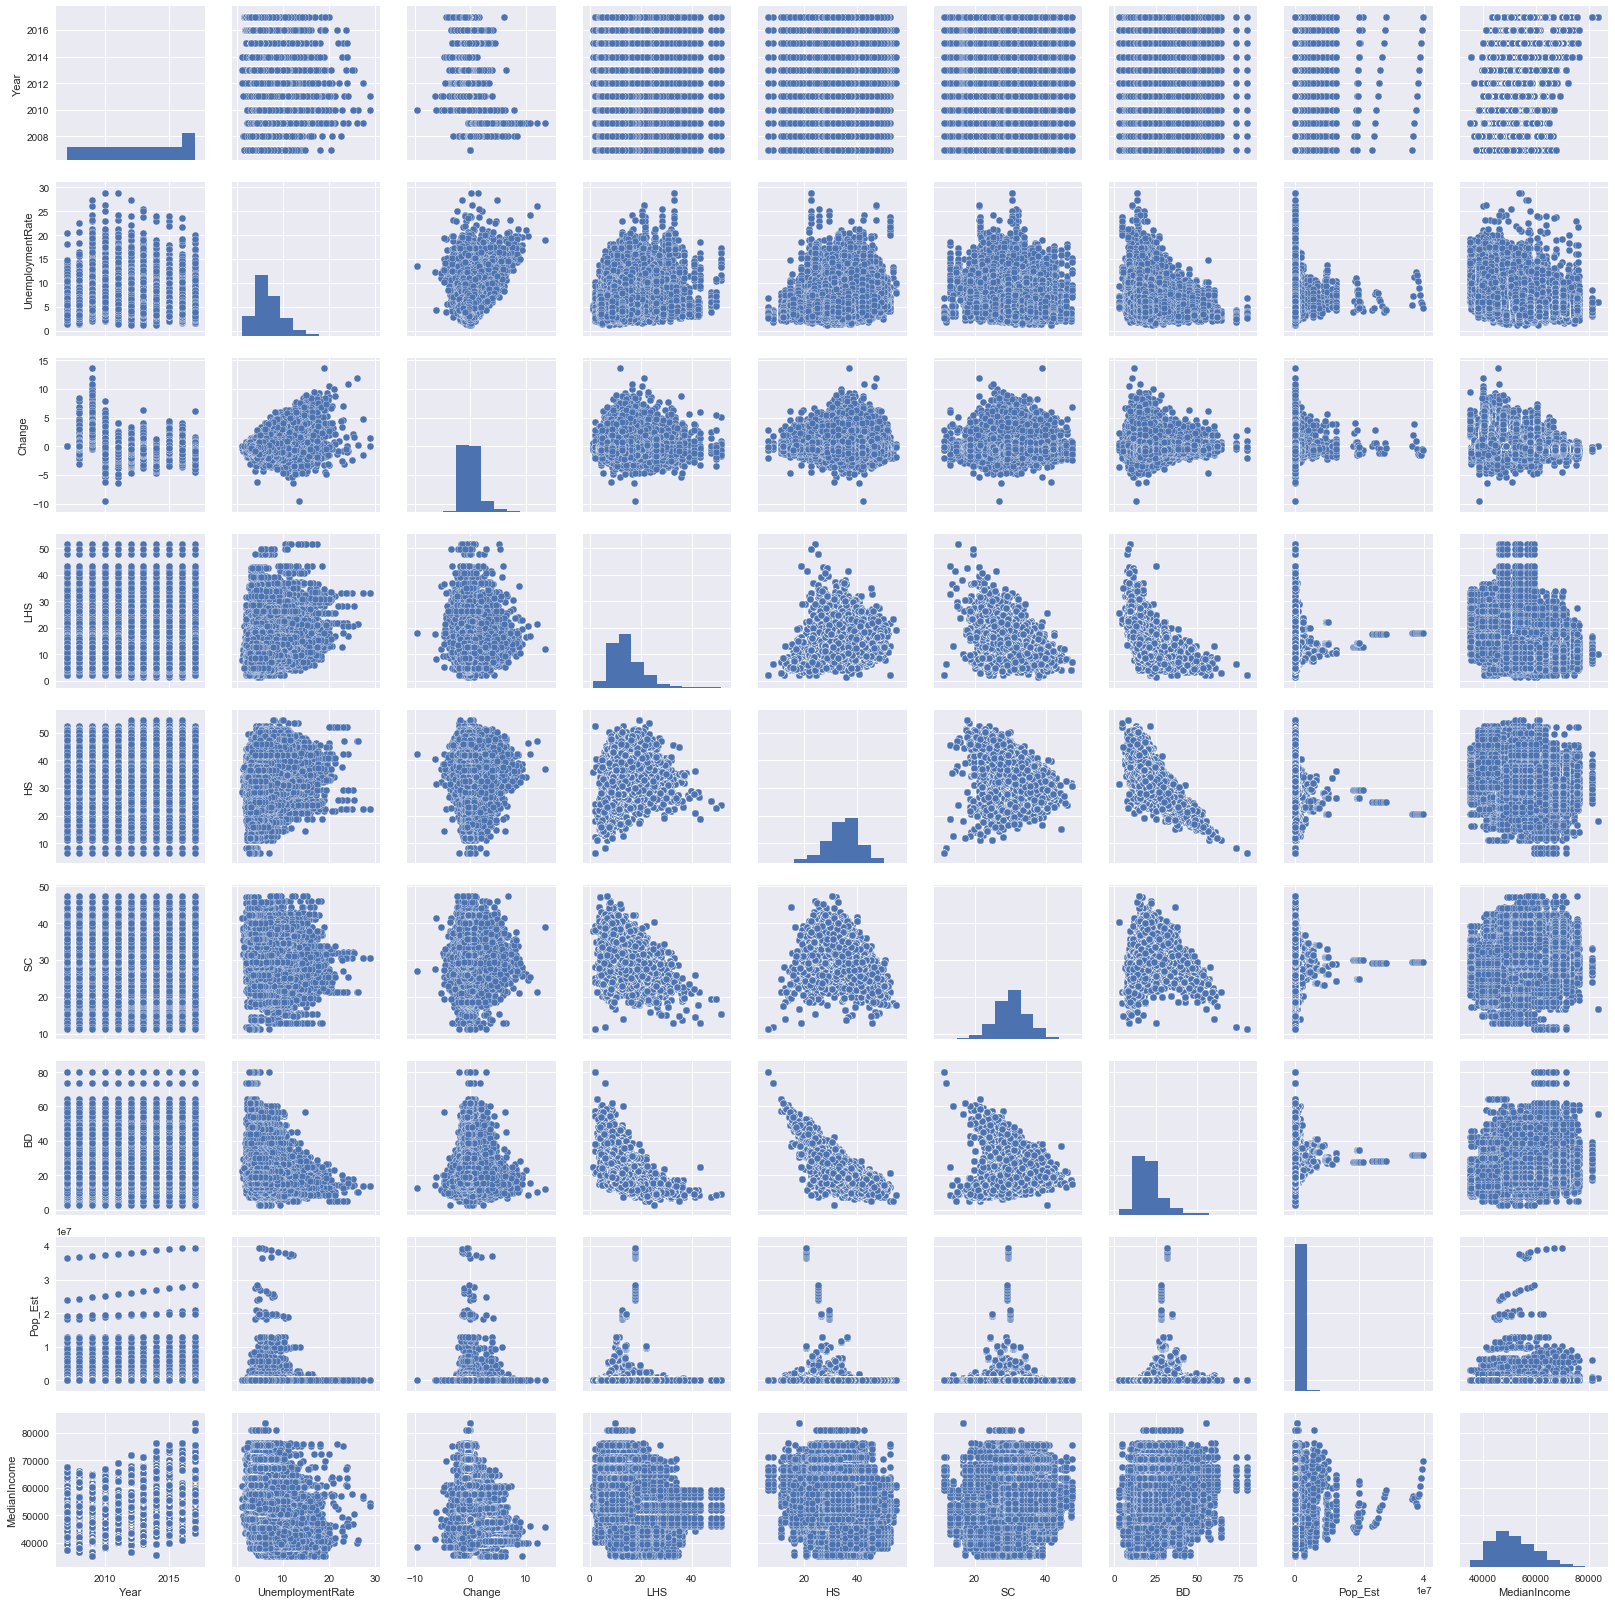

In [31]:
plot_data = data2.drop(['State', 'Area', 'Region', 'StateCode', 'RegionCode', 'AreaCode'], axis=1)
sns.pairplot(plot_data)
plt.show()

It looks like 'Less than high school' and 'High school' area positively correlated with 'Unemployment Rate', and 'Some college' and 'Bachelor's degree' are negatively correlated with 'Unemployment Rate'. We can also see a positive correlation between 'Change' and 'Unemployment Rate'. As expected, most of the education level variables are correlated with each other. 

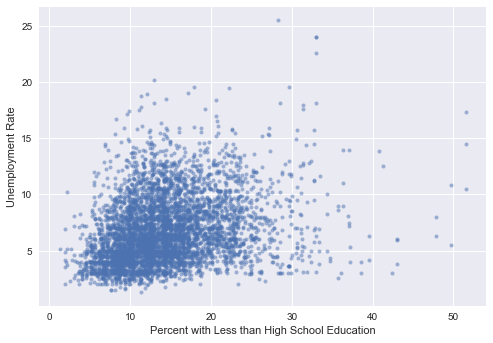

In [32]:
# Look at 'Percent with Less than High School' vs 'Unemployment Rate'
# Use a sample of the data, to get a nicer plot
data_sample = data2.sample(5000)
x = data_sample.LHS
y = data_sample.UnemploymentRate
plt.plot(x, y, marker='.', markersize=8, linestyle='none', alpha=0.5)
plt.xlabel('Percent with Less than High School Education')
plt.ylabel('Unemployment Rate')
plt.savefig('LHS_UnemploymentRate.png')
plt.show()

In [33]:
# Look at correlation between population and unemployment rate
r1 = stats.pearsonr(data2.UnemploymentRate, data2.Pop_Est)
print 'The correlation coefficient for unemployment rate and population estimate is: {}'.format(r1[0])

The correlation coefficient for unemployment rate and population estimate is: 0.00189874692412


In [34]:
# Look at correlation between median income and unemployment rate
r2 = stats.pearsonr(data2.UnemploymentRate, data2.MedianIncome)
print 'The correlation coefficient for unemployment rate and median income is: {}'.format(r2[0])

The correlation coefficient for unemployment rate and median income is: -0.333654278775


In [35]:
# Construct confidence intervals for unemployment rates in each region
s_rates = [data2.UnemploymentRate[i] for i in data2.index if data2.Region[i] == 'South']
ne_rates = [data2.UnemploymentRate[i] for i in data2.index if data2.Region[i] == 'Northeast']
mw_rates = [data2.UnemploymentRate[i] for i in data2.index if data2.Region[i] == 'Midwest']
w_rates = [data2.UnemploymentRate[i] for i in data2.index if data2.Region[i] == 'West']

s_ci = np.percentile(s_rates, [2.5, 97.5])
ne_ci = np.percentile(ne_rates, [2.5, 97.5])
mw_ci = np.percentile(mw_rates, [2.5, 97.5])
w_ci = np.percentile(w_rates, [2.5, 97.5])

print 'The 95% confidence interval for unemployment rates in the south is: (', s_ci[0], ',', s_ci[1], ')'
print 'The 95% confidence interval for unemployment rates in the northeast is: (', ne_ci[0], ',', ne_ci[1], ')'
print 'The 95% confidence interval for unemployment rates in the midwest is: (', mw_ci[0], ',', mw_ci[1], ')'
print 'The 95% confidence interval for unemployment rates in the west is: (', w_ci[0], ',', w_ci[1], ')'

The 95% confidence interval for unemployment rates in the south is: ( 3.2 , 14.1 )
The 95% confidence interval for unemployment rates in the northeast is: ( 3.2 , 10.7 )
The 95% confidence interval for unemployment rates in the midwest is: ( 2.4 , 12.7 )
The 95% confidence interval for unemployment rates in the west is: ( 2.6 , 15.7 )


In [36]:
# Calculate the mean percent of population with a bachelor's degree
z = data2.BD.mean()
print z
# Calculate the mean of all the unemployment rates
ue_mu = data2.UnemploymentRate.mean()
print ue_mu

21.1021796659
6.79412969866


<p>**In previous analysis, I noticed a negative correlation between percent of population with a bachelor's degree and unemployment rate. I would like to know if the difference in unemployment rates is significantly different for regions where more than 25% of the population has a bachelor's degree than in regions where the percentage is less than 25%. I will conduct a hypothesis test, with the null hypothesis test being that there is no difference in the unemployment rates for these two regions.**</p>

In [37]:
# Look at the difference in the observed means
mean1 = data2.UnemploymentRate[data2.BD>=25].mean()
mean2 = data2.UnemploymentRate[data2.BD<25].mean()
print "For areas where at least 25% of the population have a bachelor's degree, the mean is: ", mean1
print "For areas where less than 25% of the population have a bachelor's degree, the mean is: ", mean2
diff_means_obs = mean2 - mean1
print 'The difference in the observed means is: ', diff_means_obs

For areas where at least 25% of the population have a bachelor's degree, the mean is:  5.90587792012
For areas where less than 25% of the population have a bachelor's degree, the mean is:  7.05432103307
The difference in the observed means is:  1.14844311295


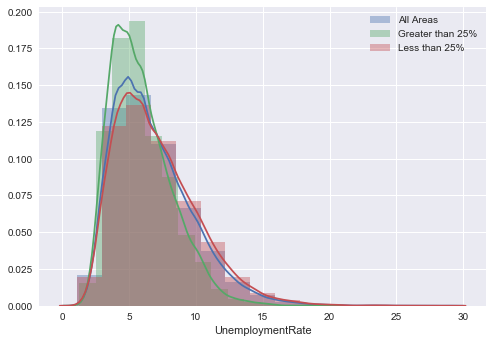

In [38]:
#Look at the distribution of the means
above25_data = data2.UnemploymentRate[data2.BD>=25]
below25_data = data2.UnemploymentRate[data2.BD<25]
sns.distplot(data2.UnemploymentRate, bins=15, label='All Areas')
sns.distplot(above25_data, bins=15, label='Greater than 25%')
sns.distplot(below25_data, bins=15, label='Less than 25%')
plt.legend()
plt.show()

In [39]:
# Test for normality
test = stats.normaltest(data2.UnemploymentRate)
print test
# Calculate the variance for each group
var1 = np.var(above25_data)
var2 = np.var(below25_data)
# Find the sample sizes
print 'The sample size for above 25 is: ', len(above25_data)
print 'The sample size for below 25 is: ', len(below25_data)

print "The variance for areas with greater than 25% bachelor's degree' is: ", var1
print "The variance for areas with less than 25% bachelor's degrees is: ", var2

NormaltestResult(statistic=6122.4126055455799, pvalue=0.0)
The sample size for above 25 is:  7962
The sample size for below 25 is:  27181
The variance for areas with greater than 25% bachelor's degree' is:  5.28348717826
The variance for areas with less than 25% bachelor's degrees is:  9.54767539806


In [40]:
# Use the Mann-Whitney test to test the hypothesis
stats.mannwhitneyu(below25_data, above25_data, alternative='greater')

MannwhitneyuResult(statistic=131361180.0, pvalue=2.7035899061006668e-186)

<p>**Looking at the distributions, we can see that they are all positively skewed. For areas with less than 25% of the population with a bachelor's degree, there is more variation in the unemployment rates than for areas with more then 25% bachelor's degrees. The normal test shows that the data is not from a normal distribution. The Mann-Whitney test gives us a p-value of almost zero, so we have evidence that the mean unemployment rate is higher for areas where less than 25% of the population have a bachelor's degree.**</p>

In [41]:
# Use the bootstrap approach to test the hypothesis that the means are equal
above25_data_shifted = above25_data - np.mean(above25_data) + np.mean(data2.UnemploymentRate)
below25_data_shifted = below25_data - np.mean(below25_data) + np.mean(data2.UnemploymentRate)

# Create bootstrap replicates for the mean and calculate the differences
bs_reps_above = fn.draw_bs_reps(above25_data_shifted, np.mean, 10000)
bs_reps_below = fn.draw_bs_reps(below25_data_shifted, np.mean, 10000)
bs_reps_diff = bs_reps_below - bs_reps_above

# Calculate the p-value
p_value = float((bs_reps_diff >= diff_means_obs).sum())/len(bs_reps_diff)

print "The p-value is: ", p_value

The p-value is:  0.0


<p>**Using the bootstrap approach, we also get a p-value of zero, so we conclude that the mean unemployment rate is higher for areas where less than 25% of the population has a bachelor's degree.**</p>

In [42]:
# Look at the median income for each region
south_income = [data2.MedianIncome[i] for i in data2.index if data2.Region[i]=='South']
northeast_income = [data2.MedianIncome[i] for i in data2.index if data2.Region[i]=='Northeast']
midwest_income = [data2.MedianIncome[i] for i in data2.index if data2.Region[i]=='Midwest']
west_income = [data2.MedianIncome[i] for i in data2.index if data2.Region[i]=='West']

s_income_mu = np.mean(south_income)
ne_income_mu = np.mean(northeast_income)
mw_income_mu = np.mean(midwest_income)
w_income_mu = np.mean(west_income)

print s_income_mu
print ne_income_mu
print mw_income_mu
print w_income_mu

48250.0635445
56714.6866883
53033.9537779
55707.6909906


In [43]:
# Construct 95% confidence interval for each region
print 'Confidence interval for median income in the south is: {}'.format(np.percentile(south_income, [2.5, 97.5]))
print 'Confidence interval for median income in the northeast is: {}'.format(np.percentile(northeast_income, [2.5, 97.5]))
print 'Confidence interval for median income in the midwest is: {}'.format(np.percentile(midwest_income, [2.5, 97.5]))
print 'Confidence interval for median income in the west is: {}'.format(np.percentile(west_income, [2.5, 97.5]))

Confidence interval for median income in the south is: [ 36641.  68277.]
Confidence interval for median income in the northeast is: [ 47680.  73227.]
Confidence interval for median income in the midwest is: [ 44648.  67244.]
Confidence interval for median income in the west is: [ 41280.  74172.]


### Add data for minimum wage and CPI

In [49]:
new_data = pd.read_csv('FinalData2.csv').drop('Unnamed: 0', axis=1)
new_data.head()

,State,Area,Year,UnemploymentRate,Change,Region,LHS,HS,SC,BD,Pop_Est,MedianIncome,RegionCode,StateCode,AreaCode,Min_Wage,CPI
0,AL,Alabama,2007,4.0,0.0,South,15.2,31.0,29.8,24.0,4737752,42212.0,2,1,9,5.15,207.342417
1,AL,Alabama,2008,5.7,1.7,South,15.2,31.0,29.8,24.0,4752904,44476.0,2,1,9,5.85,215.302500
2,AL,Alabama,2009,11.0,5.3,South,15.2,31.0,29.8,24.0,4768103,39980.0,2,1,9,6.55,214.537000
3,AL,Alabama,2010,10.5,-0.5,South,15.2,31.0,29.8,24.0,4783352,40933.0,2,1,9,7.25,218.055500
4,AL,Alabama,2011,9.6,-0.9,South,15.2,31.0,29.8,24.0,4798649,42590.0,2,1,9,7.25,224.939167


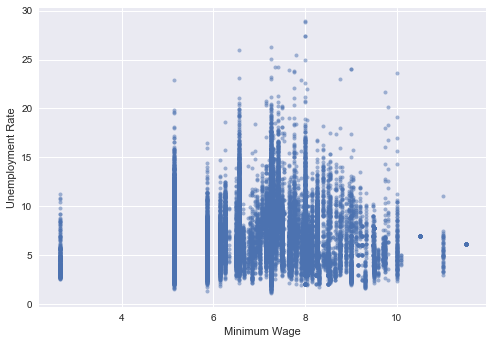

In [57]:
x1 = new_data.Min_Wage
y1 = new_data.UnemploymentRate
x2 = new_data.CPI

plt.plot(x1, y1, marker='.', markersize=8, linestyle='none', alpha=0.5)
plt.xlabel('Minimum Wage')
plt.ylabel('Unemployment Rate')
plt.show()

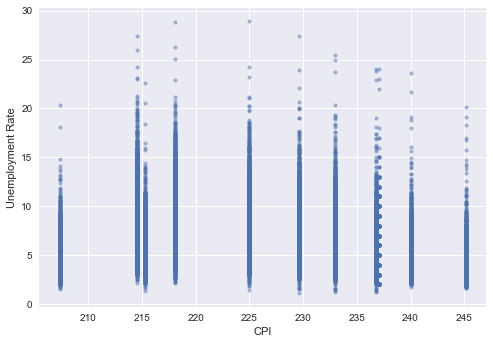

In [58]:
plt.plot(x2, y1, marker='.', markersize=8, linestyle='none', alpha=0.5)
plt.xlabel('CPI')
plt.ylabel('Unemployment Rate')
plt.show()